# Ornella Sofía Gigante

# Caso 1. Predicción de enfermedades cardiovasculares

## Para este caso de detección de un nuevo sistema de enfermedades cardiovasculares, creo que de lo que hemos estudiado convendría utilizar un sistema de árbol de desición, ya que esto nos permitiría detectar pacientes con o sin la patología de una manera sencilla. 

In [5]:
## Importo las librerías necesarias para llevar a cabo la tarea
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [12]:
# Cargo el archivo csv
df_cardio=pd.read_csv('C:/Users/ornel/OneDrive/Escritorio/Cardiovascular_Disease_Dataset.csv')
# Reviso los primeros registros
df_cardio.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [14]:
# Divido los datos en variables predictoras (X) y variable objetivo (y)
X = df[['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol', 'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels']]
y = df['target']

In [15]:
# Divido el dataset en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Creo el modelo de árbol de decisión
model = DecisionTreeClassifier()

In [17]:
# Entreno el modelo usando el conjunto de entrenamiento
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
# Predecir las etiquetas para el conjunto de prueba
y_pred = model.predict(X_test)

In [19]:
# Evaluación del modelo de clasificación
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: ", accuracy)

Precisión del modelo:  0.96


## Utilizaré otra alternativa que no se ha visto en el fastbook llamado Naive Bayes. eñ cual es un método de análisis supervisado que funciona tanto en datos categóricos como continuos, o cual lo hace perfecto para este dataframe que tiene una combinación de datos y asume una independencia condicional entre los atributos, lo cual refuerza el hecho de que funcionará con este dataframe que contiene datos con múltiples atributos. 

In [21]:
#Se carga el conjunto de datos 
import pandas as pd
df_naive= pd.read_csv('C:/Users/ornel/OneDrive/Escritorio/Cardiovascular_Disease_Dataset.csv')

# Reviso de nuevo los primeros registros
df_naive.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [23]:
#Divido el conjunto de datos en atributos (x) y en variable objetivo (y) 
X = df_naive[['age', 'gender', 'chestpain', 'restingBP', 'serumcholestrol', 'fastingbloodsugar', 'restingrelectro', 'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels']]
y = df_naive['target']


In [24]:
#Divido el conjunto de datos en conjuntos de entrenamiento y prueba

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
#Se entrenará el modelo de Naive Bayes 

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)


GaussianNB()

In [26]:
#Se realizarán las predicciones 
y_pred = model.predict(X_test)


In [27]:
#Se hará la evaluación del modelo 

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
confusion_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_matrix)


Accuracy: 0.975
Confusion Matrix:
 [[ 80   3]
 [  2 115]]


La evaluación del modelo de supervisión utilizada anteriormente muestra que tiene una precisión del 97.5%.
La matriz de confusión indica que el modelo predijo de manera correcta 80 muestras como + y se equivocó en 3 muestras clasificándolas como negativas. 
Además de eso, predijo también de manera incorrecta 2 muestras como positivas y acertó en 115 muestras clasificándolas como negativas.

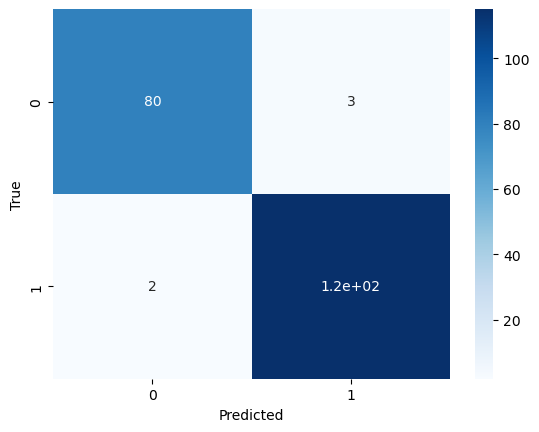

In [28]:
#Agregaré un gráfico para que se pueda visualizar un poco los resultados 

import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


# Caso 2. Nivel de estrés

En este caso he elegido Random Forest para llevar a cabo este trabajo, ya que lo veo adecuado para este problema porque puede manejar múltiples variables de entrada y encontrar relaciones no lineales entre estas variables y el nivel de estrés. Además de eso, el algoritmo tiene un buen rendimiento en conjuntos de datos desequilibrados y puede manejar datos faltantes. 
Random Forest también proporciona una medida de importancia de variables que puede llegar a ser útil para identificar cuáles son las variables más relevantes para predecir el nivel de estrés en este caso.

In [37]:
# Se hace la carga de datos a través de la ruta absoluta del dataframe 
import pandas as pd
df_estres = pd.read_csv('C:/Users/ornel/OneDrive/Escritorio/Sleep_health_and_lifestyle_dataset.csv')


Antes de aplicar el algoritmo, se deben realizar algunas transformaciones en los datos. En este caso, se pueden eliminar las columnas innecesarias para el análisis (Person ID, Gender, Occupation, Sleep Disorder) y convertir las variables categóricas en variables binarias utilizando one-hot encoding.

In [38]:
#Transformaciónd e datos, eliminación de información no importante para el ejercicio
df_estres = df_estres.drop(['Person ID', 'Gender', 'Occupation', 'Sleep Disorder'], axis=1)
df_estres= pd.get_dummies(df_estres)


Se debe dividir el conjunto de datos en variables predictoras (X) y la variable objetivo (y), que en este caso es el nivel de estrés y realizar una división adicional en conjuntos de entrenamiento y prueba.

In [39]:
#División de los datos 
X = df_estres.drop(['Stress Level'], axis=1)
y = df_estres['Stress Level']
  
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Se utiliza el algoritmo de Random Forest para entrenar el modelo utilizando el conjunto de datos de entrenamiento.

In [40]:
#Entrenamiento del modelo 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Se evalúa la precisión del modelo utilizando el conjunto de datos de prueba.

In [41]:
#Evaluación del modelo 

from sklearn.metrics import accuracy_score

y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy * 100))


Precisión del modelo: 100.00%


Para clasificar los resultados en las tres categorías ('No está estresado', 'Está estresado', 'Está muy estresado'), se pueden utilizar los valores de predicción obtenidos por el modelo.

In [46]:
#Clasificación de los resultados 
def categorize_stress_level(stress_level): 
    if stress_level >= 0 and stress_level <= 3: 
        return "No está estresado" 
    elif stress_level > 3 and stress_level <= 6:
        return "Está estresado"
    elif stress_level > 6 and stress_level <= 8: 
        return "Está muy estresado"

prediccion = [categorize_stress_level(stress_level) for stress_level in y_pred]

print(prediccion)

['No está estresado', 'Está muy estresado', 'Está muy estresado', 'No está estresado', 'Está muy estresado', 'Está muy estresado', 'Está muy estresado', 'Está estresado', 'No está estresado', 'Está estresado', 'Está muy estresado', 'Está estresado', 'Está estresado', 'Está muy estresado', 'Está estresado', 'Está muy estresado', 'Está estresado', 'Está muy estresado', 'No está estresado', 'Está estresado', 'Está estresado', 'Está estresado', 'Está muy estresado', 'Está estresado', 'Está estresado', 'Está estresado', 'Está muy estresado', 'Está muy estresado', 'Está muy estresado', 'No está estresado', 'Está estresado', 'Está estresado', 'Está estresado', 'No está estresado', 'Está muy estresado', 'Está estresado', 'Está muy estresado', 'Está estresado', 'Está estresado', 'Está estresado', 'Está muy estresado', 'Está muy estresado', 'Está muy estresado', 'Está muy estresado', 'Está estresado', 'Está estresado', 'Está estresado', 'Está estresado', 'Está muy estresado', 'Está estresado', '

Se hará un gráfico de barras para que el resultado pueda visualizarse de una manera más limpia 

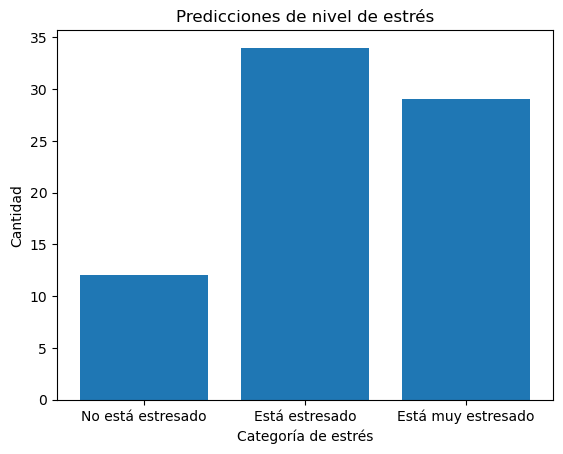

In [47]:
import matplotlib.pyplot as plt

categories = ["No está estresado", "Está estresado", "Está muy estresado"]
counts = [prediccion.count(category) for category in categories]

plt.bar(categories, counts)
plt.xlabel("Categoría de estrés")
plt.ylabel("Cantidad")
plt.title("Predicciones de nivel de estrés")
plt.show()


# Reflexión y respuestas

## Con el algoritmo obtenido, ¿crees que los datos usados son suficientes para poder detectar el estrés de las personas?,¿por qué?

Los datos utilizados pueden ser útiles para identificar patrones relacionados con el estrés de una persona. Sin embargo, es posible que haya otras variables que también influyan en el nivel de estrés de los empleados y que no estén incluidas en el dataset que se ha proporcionado para la actividad. Además, el modelo de random forest está asumiendo que las variables proporcionadas son suficientes para predecir el estrés, pero puede haber otros factores personales o situacionales que no se estén considerando a la hora de hacer el análisis. En resumen, el algoritmo a ha sido de utilizad y el resultado es óptimo,pero podría ser mejor. 